In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# For reference, see chapter 9 of Python for Data Analysis, 3rd Edition
# https://wesmckinney.com/book/plotting-and-visualization.html

# Practice

See [this page](https://github.com/HeardLibrary/digital-scholarship/tree/master/data/codegraf) for information about the dataset. You will need to download the `flight_data_set.zip` file and extract it into the working folder.

**Problem 1. Plot average delay time by carrier**

Load the data into a DataFrame

In [24]:
url = '/Users/gennachiaro/Documents/coding/learning-coding/digital-scholarship/data/codegraf/flight_data_set.csv'
flights = pd.read_csv(url)
flights.head()

,Airport Code,Airport Name,Minutes of Delay per Flight,Carrier Code,Carrier Name,City,Date,Minutes of Delay,Number of Flights,Ontime Category,State
0,PHX,Phoenix Sky Harbor International,NaN,9E,Pinnacle,Phoenix,1/1/2013,NaN,0.0,Cancelled,AZ
1,DEN,Denver International,NaN,9E,Pinnacle,Denver,1/1/2013,NaN,2.0,Cancelled,CO
2,MCO,Orlando International,NaN,9E,Pinnacle,Orlando,1/1/2013,NaN,2.0,Cancelled,FL
3,ATL,Hartsfield-Jackson Atlanta,NaN,9E,Pinnacle,Atlanta,1/1/2013,NaN,59.0,Cancelled,GA
4,ORD,Chicago O'Hare International,NaN,9E,Pinnacle,Chicago,1/1/2013,NaN,13.0,Cancelled,IL


Look at the "Minutes of Delay per Flight" column in the original data file. The blank cells have been imported as `NaN`, but they actually represent flights that were on time (delay of zero). Convert all `NaN` values in that column to 0. 

After doing the conversion, use the this code to group the data by `Carrier Name` and then find the mean minutes of delay:

```
grouped_carrier = flights.groupby(['Carrier Name']).mean()
```

See the ["Grouping and group operations" section of the optional "Summarizing and rearranging DataFrames" lesson](https://heardlibrary.github.io/digital-scholarship/script/codegraf/009c/#grouping-and-group-operations-5m13s) to understand how the `.groupby()` and `.mean()` methods work to summarize data by a category.

In [26]:
flights['Minutes of Delay per Flight'] = flights['Minutes of Delay per Flight'].fillna(0)
#flights = flights.sort_values(by = 'Minutes of Delay', ascending = False)
flights.head()

grouped_carrier = flights.groupby(['Carrier Name']).mean()
grouped_carrier = grouped_carrier.sort_values(by = 'Minutes of Delay per Flight', ascending = False)

grouped_carrier.head()


,Minutes of Delay per Flight,Minutes of Delay,Number of Flights
Carrier Name,,,
ExpressJet,34.993497,5973.152601,241.776756
A. Eagle,34.154221,4287.151948,169.791388
Pinnacle,33.065476,2021.803810,101.416679
JetBlue,32.942472,2123.298864,86.686811
Delta,32.554545,3826.459091,271.274449


Create a horizontal bar plot showing the average minutes of delay per flight by carrier, sorted in descending order.

<AxesSubplot:xlabel='Carrier Name'>

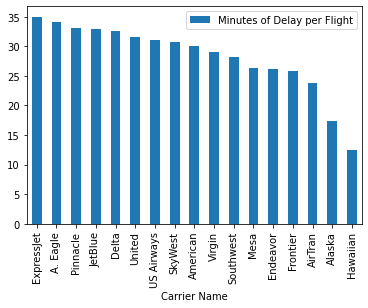

In [27]:
grouped_carrier.plot.bar(y = 'Minutes of Delay per Flight')

**Problem 2. Plot Minutes of Delay per Flight for Delta Airlines**

Create a copy of the `flights` DataFrame and convert the date column to a datetime object. Create a slice of the data that includes only Delta as the carrier. Use the `.groupby()` and `.sum()` methods to calculate the total minutes that Delta flights were late on a particular Date. See the [Slicing rows by boolean condition](https://heardlibrary.github.io/digital-scholarship/script/codegraf/009b/#slicing-rows-by-boolean-condition-7m00s) section of the "Extracting and changing DataFrame data" lesson if you forget how to slice rows by condition. NOTE: the `.sum()` method is used the same way as the `.mean()` method in the previous problem.

Create a time series plot of the "Minutes of Delay" column for the Delta data. Use a figure size of (20,10). If you want to have control over the display of the dates on the X axis, you can use the following code:

```
import matplotlib.dates as mdates
date_format = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_format)
```

Recall that all of the code related to a particular plot must be in the same cell.

**Problem 3. Seasonal pattern of delays across airlines**

Does this pattern hold across airlines? Make a copy of the `flights` DataFrame and convert the date strings into DateTime format. Group the flights by date. Find the mean, create a Series by slicing out the `Minutes of Delay per Flight` column, and assign it a name. Find the standard deviation, create a Series by slicing out the `Minutes of Delay per Flight` column, and assign it a name. 

Now create an errorbar plot with one of the series indices as the X variable and the mean series as the Y value. Use the standard deviation series as both the upper and lower bounds of the error bars.

How do the differences by date compare to the amount of variability among the airlines?